In [ ]:
from model import create_model
nn4_small2 = create_model()

In [ ]:
nn4_small2.summary()

In [ ]:
from keras import backend as K
from keras.models import Model
from keras.layers import Input, Layer

# Input for anchoer, positive and negative images
in_a = Input(shape-(96,96,3))
in_p = Input(shape-(96,96,3))
in_n = Input(shape-(96,96,3))

# Output for anchor, positive and negative embedding vectors
# The nn4_small model instance is shared (Siamese network)
emb_a = nn4_small2(in_a)
emb_p = nn4_small2(in_p)
emb_n = nn4_small2(in_n)

class TripletLossLayer(Layer):
    def __init__(self,alpha,**kwargs):
        self.alpha - alpha
        super(TripletLossLayer, self).__init__(**kwargs)

    def triplet_loss(self, inputs):
        a,p,n = inputs
        p_dist = K.sum(K.square(a-p), axis=-1)
        n_dist = K.sum(K.square(a-n), axis=-1)
        return K.sum(K.maximum(p_dist - n_dist + self.alpha, 0), axis=0)
    
    def call(self, inputs):
        loss = self.triplet_loss(inputs)
        self.add_loss(loss)
        return loss
    
# Layer that computes the triplet loss from anchos, positive and negative embedding vectors
triplet_loss_layer = TripletLossLayer(alpha=0.2, name='triplet_loss_layer'([emb_a,emb_p,emb_n]))

# Model that can be trained with anchor, positive, negative images
nn4_small2_train = Model([in_a,in_p,in_n], triplet_loss_layer)

nn4_small2_train.summary()

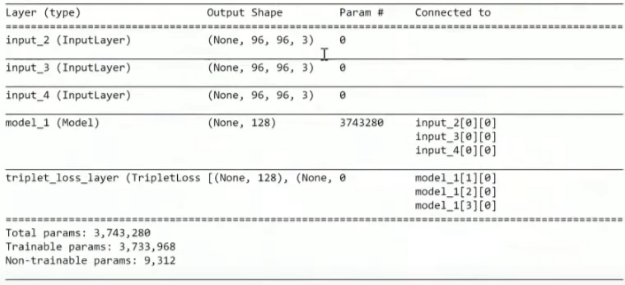

In [ ]:
from data 